In [ ]:
import numpy as np
import matplotlib.pyplot as plt



coordinates = np.array([[x[0], x[1], 1] for x in [(-0.1, -0.2), (0.5, 0.5), (-0.5, 0.2), (-0.25, 0.5), (0.2, 0.1), (0, 0.8)]])
labels = np.array([-1, 1, -1, -1, 1, 1])
lr1, lr2 = 0.5, 1.0
max_epoch = 10

In [28]:
class ADALINE():
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.errors = []


    def net_input(self, X):
        return np.dot(X, self.weights)   
             

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        
        for epoch in range(self.epochs):
            total_error = 0

            for i in range(n_samples):   
                error = y[i] - self.net_input(X[i])
                total_error += error ** 2
                self.weights += self.learning_rate * error * X[i]
            
            mse = total_error / n_samples
            self.errors.append(mse)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, MSE: {mse:.4f}")
                
            if mse < 0.001:
                print(f"Converged at epoch {epoch}")
                break
    

    def predict(self, X):
        net_input = self.net_input(X)
        return np.where(net_input >= 0, 1, -1)  

Epoch 0, MSE: 2.4831
Epoch 100, MSE: 0.3280
Epoch 200, MSE: 0.2715
Epoch 300, MSE: 0.2525
Epoch 400, MSE: 0.2458
Epoch 500, MSE: 0.2434
Epoch 600, MSE: 0.2426
Epoch 700, MSE: 0.2422
Epoch 800, MSE: 0.2421
Epoch 900, MSE: 0.2421

Training results:
Final weights: w1 = 2.3511, w2 = 1.0205, bias = -0.2590
Accuracy: 100.00%


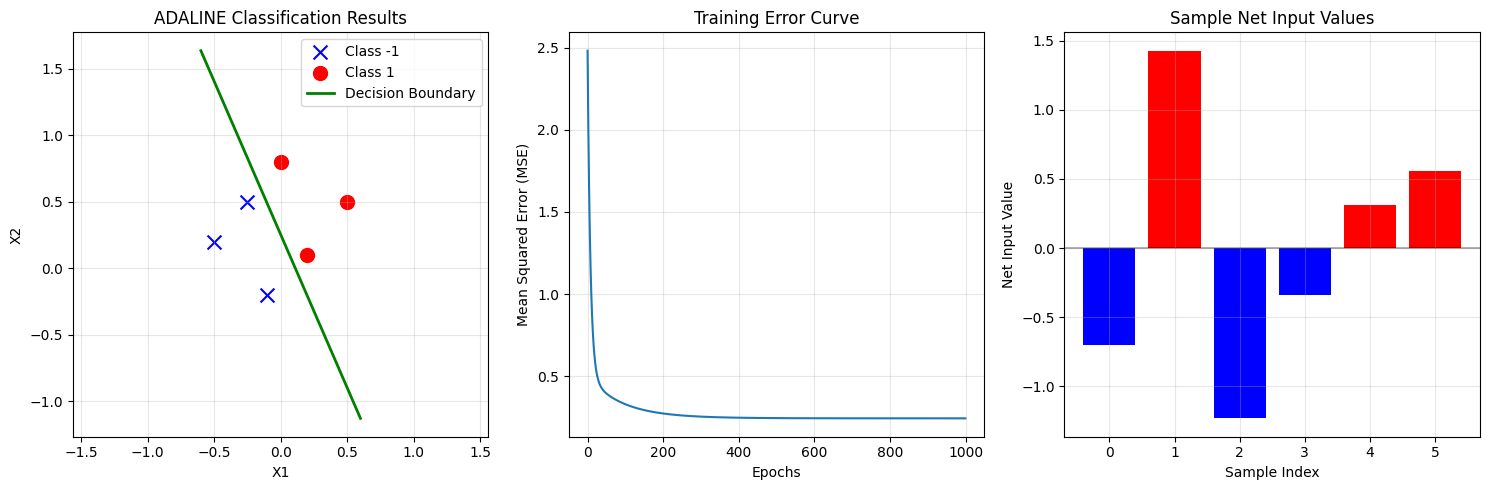


Testing new samples:
Test sample 1: coordinates(0.30, 0.30), net input: 0.7524, predicted class: 1
Test sample 2: coordinates(-0.30, 0.40), net input: -0.5562, predicted class: -1
Test sample 3: coordinates(0.10, -0.10), net input: -0.1260, predicted class: -1

Decision function: f(x) = 2.3511*x1 + 1.0205*x2 + -0.2590
Classification rule: if f(x) >= 0, predict class 1; otherwise predict class -1

Additional Analysis:
Weights interpretation:
- Weight for x1 (w1): 2.3511
- Weight for x2 (w2): 1.0205
- Bias term (b): -0.2590
- Final MSE: 0.242047


In [30]:
if __name__ == '__main__':

    # print("Sample data:")
    # for i, (coord, label) in enumerate(zip(coordinates, labels)):
    #     print(f"Sample {i+1}: coordinates({coord[0]:.2f}, {coord[1]:.2f}), label: {label}")

    adaline = ADALINE(learning_rate=0.01, epochs=1000)
    adaline.train(coordinates, labels)

    print("\nTraining results:")
    print(f"Final weights: w1 = {adaline.weights[0]:.4f}, w2 = {adaline.weights[1]:.4f}, bias = {adaline.weights[2]:.4f}")
    # Predict training samples
    predictions = adaline.predict(coordinates)
    print(f"Accuracy: {np.mean(predictions == labels) * 100:.2f}%")


    # Visualization
    plt.figure(figsize=(15, 5))

    # 1. Sample distribution and decision boundary
    plt.subplot(1, 3, 1)

    # Plot sample points
    for i, (coord, label) in enumerate(zip(coordinates, labels)):
        if label == 1:
            plt.scatter(coord[0], coord[1], c='red', marker='o', s=100, label='Class 1' if i == 1 else "")
        else:
            plt.scatter(coord[0], coord[1], c='blue', marker='x', s=100, label='Class -1' if i == 0 else "")

    # Plot decision boundary
    x_min, x_max = -0.6, 0.6
    y_min, y_max = -0.3, 0.9
    xx = np.linspace(x_min, x_max, 100)

    # Decision boundary equation: w1*x + w2*y + b = 0 => y = (-w1*x - b)/w2
    if abs(adaline.weights[1]) > 1e-10:  # Avoid division by zero
        yy = (-adaline.weights[0] * xx - adaline.weights[2]) / adaline.weights[1]
        plt.plot(xx, yy, 'g-', linewidth=2, label='Decision Boundary')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('ADALINE Classification Results')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')

    # 2. Training error curve
    plt.subplot(1, 3, 2)
    plt.plot(adaline.errors)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Training Error Curve')
    plt.grid(True, alpha=0.3)

    # 3. Net input values
    plt.subplot(1, 3, 3)
    net_inputs = adaline.net_input(coordinates)
    plt.bar(range(len(net_inputs)), net_inputs, color=['blue' if label == -1 else 'red' for label in labels])
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Sample Index')
    plt.ylabel('Net Input Value')
    plt.title('Sample Net Input Values')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Test new samples
    print("\nTesting new samples:")
    test_samples = np.array([
        [0.3, 0.3, 1],
        [-0.3, 0.4, 1],
        [0.1, -0.1, 1]
    ])

    for i, sample in enumerate(test_samples):
        prediction = adaline.predict(sample)
        net_input = adaline.net_input(sample)
        print(f"Test sample {i+1}: coordinates({sample[0]:.2f}, {sample[1]:.2f}), net input: {net_input:.4f}, predicted class: {prediction}")

    # Print decision function
    print(f"\nDecision function: f(x) = {adaline.weights[0]:.4f}*x1 + {adaline.weights[1]:.4f}*x2 + {adaline.weights[2]:.4f}")
    print("Classification rule: if f(x) >= 0, predict class 1; otherwise predict class -1")

    # Additional analysis
    print(f"\nAdditional Analysis:")
    print("Weights interpretation:")
    print(f"- Weight for x1 (w1): {adaline.weights[0]:.4f}")
    print(f"- Weight for x2 (w2): {adaline.weights[1]:.4f}") 
    print(f"- Bias term (b): {adaline.weights[2]:.4f}")
    print(f"- Final MSE: {adaline.errors[-1]:.6f}")